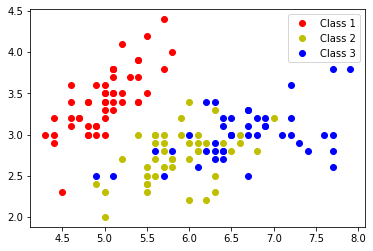

In [2]:
import numpy as np
import matplotlib.pyplot as plt

data = np.loadtxt('datasets/ldaData.txt')
c1 = data[:50]
c2 = data[50:93]
c3 = data[93:]

plt.plot(c1.T[0], c1.T[1], 'ro', label="Class 1")
plt.plot(c2.T[0], c2.T[1], 'yo', label="Class 2")
plt.plot(c3.T[0], c3.T[1], 'bo', label="Class 3")
plt.legend()
plt.savefig('lda_data.png')


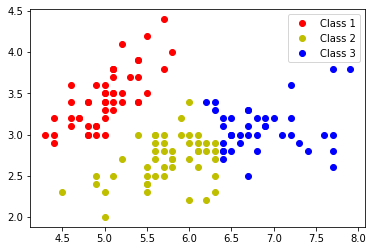

In [3]:
class LDA():
    def fit(self, c1, c2, c3):
        self.c1_c2_discriminant = self.get_discriminant_between_classes(c1, c2)
        self.c1_c3_discriminant = self.get_discriminant_between_classes(c1, c3)
        self.c2_c3_discriminant = self.get_discriminant_between_classes(c2, c3)
        
    
        
    def get_discriminant_between_classes(self, classX, classY):
        mean_classX = classX.mean(axis=0)
        mean_classY = classY.mean(axis=0)
        
        within_class_covariance = sum([np.outer(x - mean_classX, x - mean_classX) for x in classX])  \
                            + sum([np.outer(x - mean_classY, x - mean_classY) for x in classY])
        
        discriminant = np.linalg.inv(within_class_covariance)@(mean_classX - mean_classY)
        return discriminant
    
    
    def is_classX_more_likely_than_classY(self, x, classX, classY, discriminant):
        def gaussian(x, mean, variance):
            return np.exp(-(x - mean)**2/(2 * variance)) / np.sqrt(2 * np.pi * variance)
        
        x = x@discriminant
        classX = classX@discriminant
        classY = classY@discriminant
        
        if gaussian(x, np.mean(classX), np.var(classX)) > gaussian(x, np.mean(classY), np.var(classY)):
            return True
        else:
            return False
        
        
    def classify(self, x):
        is_c1 = True
        is_c2 = True
        is_c3 = True
        
        answer = self.is_classX_more_likely_than_classY(x, c1, c2, self.c1_c2_discriminant)
        is_c1 = is_c1 and answer
        is_c2 = is_c2 and not answer
        
        answer = self.is_classX_more_likely_than_classY(x, c1, c3, self.c1_c3_discriminant)
        is_c1 = is_c1 and answer
        is_c3 = is_c3 and not answer
        
        answer = self.is_classX_more_likely_than_classY(x, c2, c3, self.c2_c3_discriminant)
        is_c2 = is_c2 and answer
        is_c3 = is_c3 and not answer
        
        return [is_c1, is_c2, is_c3]
    
    
    def plot_clusters(self, data):
        c1 = np.asarray([x for x in data if self.classify(x)[0]])
        c2 = np.asarray([x for x in data if self.classify(x)[1]])
        c3 = np.asarray([x for x in data if self.classify(x)[2]])
        
        plt.plot(c1.T[0], c1.T[1], 'ro', label="Class 1")
        plt.plot(c2.T[0], c2.T[1], 'yo', label="Class 2")
        plt.plot(c3.T[0], c3.T[1], 'bo', label="Class 3")
        plt.legend()
        
        
           
lda = LDA()
lda.fit(c1, c2, c3)
lda.plot_clusters(data)
plt.savefig('lda_pred.png')